In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [666]:
train = pd.read_csv('C:/Users/Aroogz/Documents/Projects/data_science/Nigeria_Telecoms_Churn/data/TRAIN.csv')
test = pd.read_csv('C:/Users/Aroogz/Documents/Projects/data_science/Nigeria_Telecoms_Churn/data/TEST.csv')
train.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123.0,4.10,76.7140,0.00,1.25,1.4951,14.0,564.0,6408.0,2.0,2G,2G,Uxaa,Mango,0.0
1,ADF0041,1316.0,43.87,98.8904,4.14,1.25,1.0244,27.0,1626.0,4373.0,1.0,2G,2G,Uxaa,Mango,0.0
2,ADF0051,2385.0,79.50,372.6300,3.51,1.25,6.0898,119.0,10411.0,22039.0,1.0,2G,2G,Weematel,Mango,0.0
3,ADF0059,1614.0,53.80,530.2000,6.85,1.25,3.3447,69.0,6822.0,6274.0,1.0,2G,2G,0,Mango,0.0
4,ADF0060,2175.0,72.50,554.1300,6.99,153.75,673204.0342,33.0,3387.0,7241.0,1.0,2G,3G,Weematel,Mango,0.0


### Examine data

In [678]:
# removing rows
X_train = train.dropna(axis=0, how='all')  # remove rows with all NA
X_train = X_train[~X_train['Most Loved Competitor network in in Month 1'].isna()]

# removing Na columns
X_train = X_train.drop(columns=['Network type subscription in Month 1','Network type subscription in Month 2'])


y_train = X_train['Churn Status']
X_train = X_train.drop(axis=1, columns=['Customer ID','Churn Status'])

X_train['cat_cust_ten'] = pd.qcut(X_train['Customer tenure in month'], q=4, labels=False)
X_train['cat_complaint'] = pd.qcut(X_train['Total Call centre complaint calls'], q=3, labels=False, duplicates='drop')
X_train['cat_data_consump'] = pd.qcut(X_train['Total Data Consumption'], q=10, labels=False)
X_train['cat_data_spend'] = pd.qcut(X_train['Total Data Spend'], q=4, labels=False)
X_train['cat_Total Offnet spend'] = pd.qcut(X_train['Total Offnet spend'], q=4, labels=False)
X_train['cat_Total Onnet spend'] = pd.qcut(X_train['Total Onnet spend '], q=4, labels=False)
X_train['cat_Total SMS Spend'] = pd.qcut(X_train['Total SMS Spend'], q=4, labels=False)
X_train['cat_Total_Spend'] = pd.qcut(X_train['Total Spend in Months 1 and 2 of 2017'], q=4, labels=False)
X_train['cat_Total_unique'] = pd.qcut(X_train['Total Unique Calls'], q=4, labels=False)
X_train['cat_net_age'] = pd.qcut(X_train['network_age'], q=4, labels=False)

# remove categorized columns
#num_col_name = X_train.columns[:10]
#X_train.drop(columns=num_col_name, inplace=True)

# dummies
X_train = pd.get_dummies(X_train)

# normalize
cols_to_norm = X_train.columns[:10]
normed_cols = (X_train[cols_to_norm] - X_train[cols_to_norm].mean(axis=0))\
/X_train[cols_to_norm].std(axis=0)
X_train.drop(labels=cols_to_norm, axis=1,inplace=True)
X_train = pd.concat([normed_cols, X_train], axis=1)
X_train.head()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,...,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
0,-1.039775,-1.039777,-0.582321,-0.499430,-0.197385,-0.314985,-0.624186,-0.374281,-0.249151,0.032903,...,0,1,0,0,1,0,0,0,0,0
1,-0.105011,-0.104933,-0.564611,-0.431451,-0.197385,-0.314985,-0.581153,-0.310736,-0.303475,-0.393314,...,0,1,0,0,1,0,0,0,0,0
2,0.732593,0.732595,-0.345997,-0.441796,-0.197385,-0.314984,-0.276615,0.214910,0.168119,-0.393314,...,0,0,1,0,1,0,0,0,0,0
3,0.128484,0.128484,-0.220158,-0.386953,-0.197385,-0.314985,-0.442125,0.000164,-0.252728,-0.393314,...,0,0,0,0,1,0,0,0,0,0
4,0.568050,0.568051,-0.201047,-0.384654,0.329000,-0.216969,-0.561292,-0.205368,-0.226914,-0.393314,...,0,0,1,0,1,0,0,0,0,0


In [679]:
# poly features
from sklearn.preprocessing import PolynomialFeatures
col_to_poly = X_train.columns[10:20]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_cols = poly.fit_transform(X_train[col_to_poly])
new_col_names = poly.get_feature_names(X_train[col_to_poly].columns)
new_feat = pd.DataFrame(poly_cols, columns= new_col_names)

X_train = X_train.drop(columns=col_to_poly).reset_index(drop=True)
X_train = pd.concat([new_feat,X_train], axis=1, ignore_index=True)

y_train = y_train.reset_index(drop=True)
X_train.shape

(1399, 308)

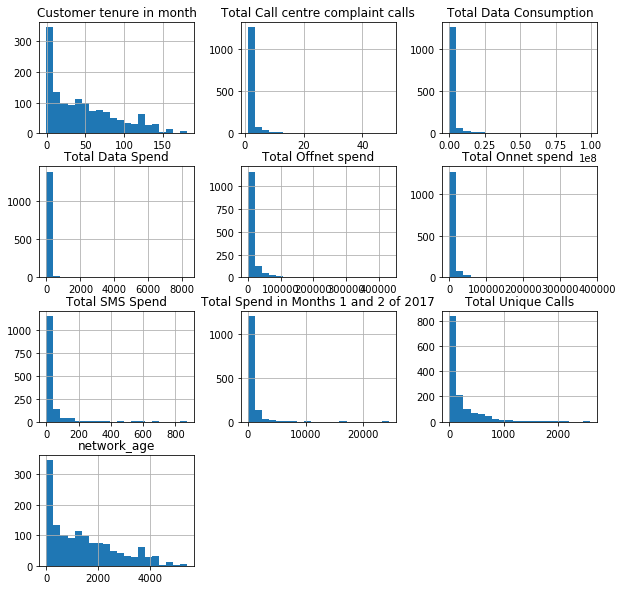

In [256]:
numeric_col = X_train.select_dtypes(include='float64')
numeric_col.hist(figsize=(10,10), bins=20);

### Examining Features

### Modelling

In [680]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_train, y_train)

In [681]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)

GaussianNB(priors=None)

In [682]:
pred = model.predict(Xtest) 

np.mean(pred == ytest)

0.62

In [532]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', class_weight='balanced')
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 17, 20],
             'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.007, 0.01]}
grid = GridSearchCV(svc, param_grid)
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 17, 20], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.007, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [431]:
print(grid.best_params_)

{'C': 15, 'gamma': 0.007}


In [432]:
grid.best_score_

0.68548963545389563

In [683]:
# try RF
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(Xtrain, ytrain)
ypred = rf.predict(Xtest)

In [684]:
np.mean(ypred == ytest)

0.72285714285714286

In [685]:
#Import Library
from sklearn.ensemble import GradientBoostingClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Gradient Boosting Classifier object
model= GradientBoostingClassifier(n_estimators=15, learning_rate=1.0, max_depth=1, random_state=0)
# Train the model using the training sets and check score
model.fit(Xtrain, ytrain)
#Predict Output
ypred= model.predict(Xtest)
np.mean(ypred == ytest)

0.76857142857142857

### Test Data

In [639]:
test.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2
0,ADF0001,1012,33.733333,1560.1156,14.04,226.3,3.126093e+06,64,14503,12402,1,3G,3G,Weematel,Mango
1,ADF0002,137,4.566667,1705.8368,73.63,5.0,1.628809e+02,515,29832,88953,9,3G,3G,ToCall,Mango
2,ADF0003,202,6.733333,1720.3008,4.36,245.0,3.334607e+06,163,228,1495,1,3G,3G,ToCall,Mango
3,ADF0004,165,5.500000,1732.2800,0.00,12.5,6.682924e+05,484,0,71928,2,3G,3G,Uxaa,Mango
4,ADF0005,759,25.300000,1873.0600,69.57,412.5,6.666975e+06,64,7616,20753,2,3G,3G,Mango,Mango


In [640]:
# removing rows


# removing Na columns
X_test = test.drop(columns=['Network type subscription in Month 1','Network type subscription in Month 2'])



X_test = X_test.drop(axis=1, columns=['Customer ID'])

X_test['cat_cust_ten'] = pd.qcut(X_test['Customer tenure in month'], q=4, labels=False)
X_test['cat_complaint'] = pd.qcut(X_test['Total Call centre complaint calls'], q=3, labels=False, duplicates='drop')
X_test['cat_data_consump'] = pd.qcut(X_test['Total Data Consumption'], q=10, labels=False)
X_test['cat_data_spend'] = pd.qcut(X_test['Total Data Spend'], q=4, labels=False)
X_test['cat_Total Offnet spend'] = pd.qcut(X_test['Total Offnet spend'], q=4, labels=False)
X_test['cat_Total Onnet spend'] = pd.qcut(X_test['Total Onnet spend '], q=4, labels=False)
X_test['cat_Total SMS Spend'] = pd.cut(X_test['Total SMS Spend'], bins=4, labels=False)
X_test['cat_Total_Spend'] = pd.cut(X_test['Total Spend in Months 1 and 2 of 2017'], bins=4, labels=False)
X_test['cat_Total_unique'] = pd.cut(X_test['Total Unique Calls'], bins=4, labels=False)
X_test['cat_net_age'] = pd.cut(X_test['network_age'], bins=4, labels=False)

# remove categorized columns
#num_col_name = X_train.columns[:10]
#X_train.drop(columns=num_col_name, inplace=True)

# dummies
X_test = pd.get_dummies(X_test)

# normalize
cols_to_norm = X_test.columns[:10]
normed_cols = (X_test[cols_to_norm] - X_test[cols_to_norm].mean(axis=0))\
/X_test[cols_to_norm].std(axis=0)
X_test.drop(labels=cols_to_norm, axis=1,inplace=True)
X_test = pd.concat([normed_cols, X_test], axis=1)
X_test.head()

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,...,Most Loved Competitor network in in Month 1_ToCall,Most Loved Competitor network in in Month 1_Uxaa,Most Loved Competitor network in in Month 1_Weematel,Most Loved Competitor network in in Month 1_Zintel,Most Loved Competitor network in in Month 2_Mango,Most Loved Competitor network in in Month 2_PQza,Most Loved Competitor network in in Month 2_ToCall,Most Loved Competitor network in in Month 2_Uxaa,Most Loved Competitor network in in Month 2_Weematel,Most Loved Competitor network in in Month 2_Zintel
0,-0.382541,-0.382541,0.510561,-0.372543,1.812739,-0.088344,-0.553656,0.358152,-0.225728,-0.449415,...,0,0,1,0,1,0,0,0,0,0
1,-1.049718,-1.049718,0.686359,0.812374,-0.593180,-0.345221,0.382539,1.321505,2.778247,3.416521,...,1,0,0,0,1,0,0,0,0,0
2,-1.000156,-1.000156,0.703808,-0.565025,2.016040,-0.071209,-0.348150,-0.538962,-0.653735,-0.449415,...,1,0,0,0,1,0,0,0,0,0
3,-1.028368,-1.028368,0.718260,-0.651721,-0.511642,-0.290316,0.318189,-0.553291,2.110160,0.033827,...,0,1,0,0,1,0,0,0,0,0
4,-0.575451,-0.575451,0.888096,0.731643,3.837059,0.202631,-0.553656,-0.074662,0.101978,0.033827,...,0,0,0,0,1,0,0,0,0,0


In [641]:
X_test.shape

(600, 33)

In [664]:
from sklearn.ensemble import GradientBoostingClassifier
#Assumed you have, X (predictor) and Y (target) for training data set and x_test(predictor) of test_dataset
# Create Gradient Boosting Classifier object
model= GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, max_depth=1, random_state=0)
# Train the model using the training sets and check score
model.fit(X_train, y_train)
#Predict Output
gb_pred = model.predict(X_test)
gb_pred = gb_pred.astype(int)
gb_submit = pd.DataFrame({'Customer Id': test['Customer ID'],
            'Churn Status': gb_pred},
                        columns=['Customer Id', 'Churn Status'])
gb_submit.to_csv('submission_3.csv', index=False)

In [603]:
rf = RandomForestClassifier(random_state=50)
rf_param_grid = {'n_estimators': [1000]}
grid_rf = GridSearchCV(rf, rf_param_grid)
grid_rf.fit(X_train, y_train);
grid_rf.best_params_, grid_rf.best_score_

rf_new = grid_rf.best_estimator_.predict(X_test)
rf_new = rf_new.astype(int)
rf_submit = pd.DataFrame({'Customer Id': test['Customer ID'],
            'Churn Status': rf_new},
                        columns=['Customer Id', 'Churn Status'])
rf_submit.to_csv('submission_2.csv', index=False)

ValueError: Number of features of the model must match the input. Model n_features is 88 and input n_features is 33 

In [ ]:
grid_rf.best_params_, grid_rf.best_score_

In [526]:
X_test.shape

(600, 33)

In [528]:
sub = pd.read_csv('submission_2.csv')
sub.head()

,Customer Id,Churn Status
0,ADF0001,1
1,ADF0002,1
2,ADF0003,1
3,ADF0004,1
4,ADF0005,1


In [665]:
def pred_change(old, new, target):
    
    return np.sum(old[target] != new[target])/old.shape[0]

old = pd.read_csv('submission.csv')
pred_change(old, gb_submit, target='Churn Status')

0.12333333333333334

In [ ]:
from xgb